## European Social Survey: Media Content & Personal Wellbeing

#### load packages and data

In [2]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

## Import PCA from sklearn
from sklearn.decomposition import PCA

In [3]:
df = pd.read_sas('data/ess6e02_4.sas7bdat', format = 'sas7bdat', encoding = "ISO-8859-1")

#### select columns

In [4]:
media = df.loc[:, 'tvtot':"pplhlp"]
personal_well_being = df.loc[:, 'wkvlorg':"physact"]
demographic = df[['cntry', 'gndr', 'hincsrca']]

combined_df = pd.concat([demographic, media, personal_well_being], axis=1)
combined_df.shape

(54673, 47)

#### handle non responses

In [5]:
a = [7.0 , 8.0, 9.0]
b = [77.0, 88.0, 99.0]
c = ['tmdotwa',
     'flapppl',
     'deaimpp',
     'tmimdng',
     'tmendng',
     'tmabdng',
     'tnapsur',
     'sedirlf',
     'plinsoc',
     'physact',
     'tvtot',
     'tvpol',
     'ppltrst',
     'pplfair',
     'pplhlp'
    ]

for col in combined_df:
        #print(x)
        if col in c:
            combined_df[col] = combined_df[col].replace(to_replace = b, value = np.nan)      
        else:
            combined_df[col] = combined_df[col].replace(to_replace = a, value = np.nan)
            
combined_df

,cntry,gndr,hincsrca,tvtot,tvpol,ppltrst,pplfair,pplhlp,wkvlorg,optftr,...,deaimpp,tmimdng,tmabdng,tmendng,tnapsur,sedirlf,rehlppl,prhlppl,plinsoc,physact
0,AL,1.0,2.0,7.0,6.0,5.0,3.0,0.0,6.0,1.0,...,5.0,8.0,8.0,8.0,0.0,3.0,6.0,6.0,4.0,7.0
1,AL,2.0,3.0,7.0,2.0,0.0,NaN,0.0,6.0,2.0,...,0.0,10.0,5.0,0.0,8.0,10.0,6.0,4.0,1.0,1.0
2,AL,2.0,4.0,4.0,0.0,5.0,5.0,4.0,5.0,1.0,...,5.0,10.0,10.0,10.0,8.0,10.0,6.0,4.0,8.0,7.0
3,AL,1.0,99.0,0.0,66.0,10.0,5.0,2.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,AL,1.0,4.0,6.0,2.0,5.0,6.0,7.0,6.0,4.0,...,NaN,10.0,NaN,NaN,7.0,10.0,6.0,6.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54668,XK,1.0,77.0,3.0,1.0,6.0,6.0,7.0,2.0,3.0,...,6.0,6.0,5.0,5.0,7.0,6.0,4.0,5.0,8.0,1.0
54669,XK,1.0,77.0,6.0,2.0,NaN,NaN,NaN,6.0,4.0,...,10.0,NaN,NaN,NaN,10.0,10.0,6.0,6.0,NaN,2.0
54670,XK,2.0,4.0,3.0,2.0,4.0,5.0,5.0,5.0,3.0,...,6.0,5.0,4.0,5.0,7.0,7.0,3.0,4.0,7.0,1.0
54671,XK,1.0,4.0,3.0,1.0,6.0,6.0,6.0,2.0,2.0,...,7.0,5.0,5.0,5.0,6.0,6.0,3.0,4.0,6.0,1.0


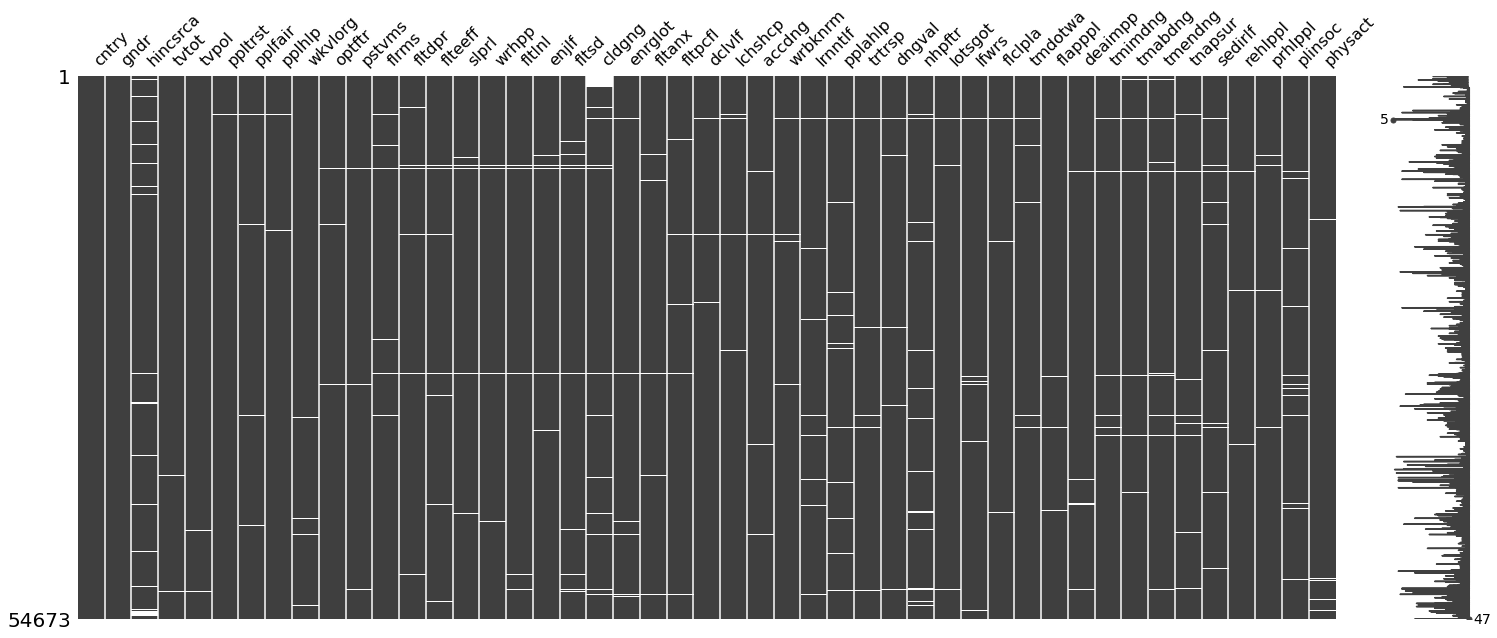

In [6]:
msno.matrix(combined_df)

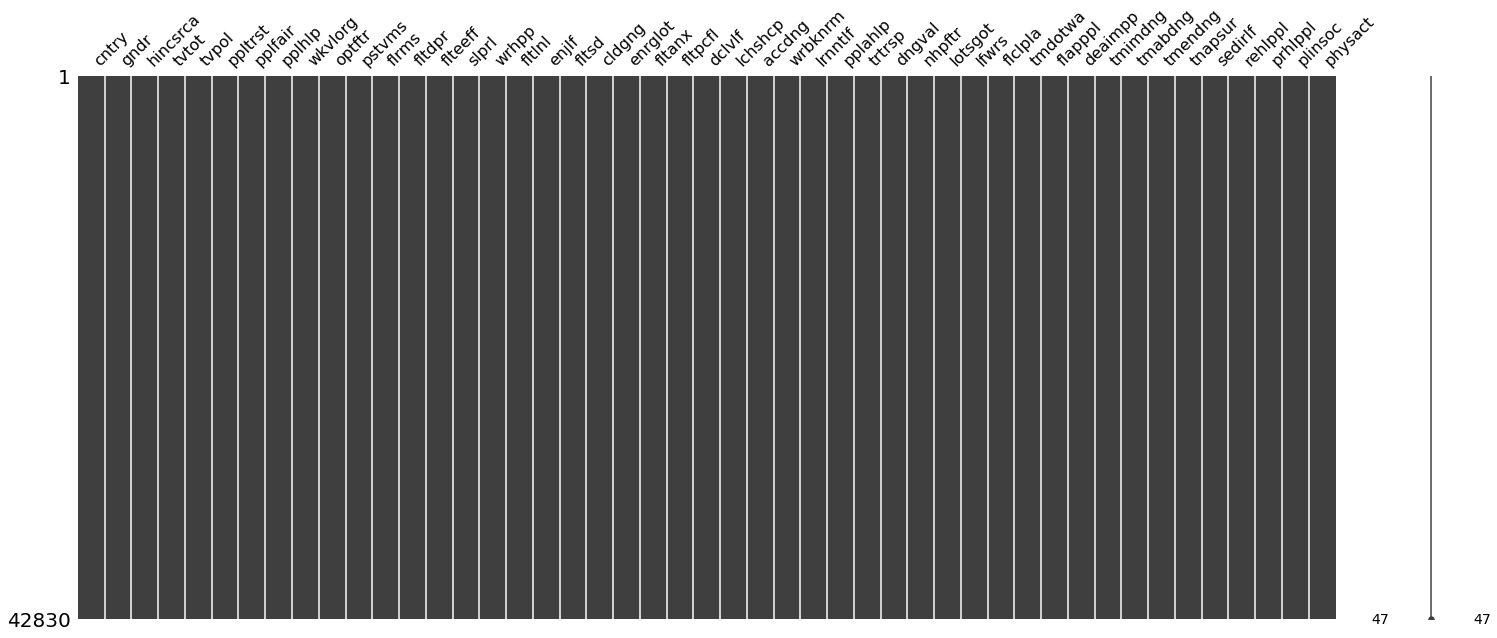

In [7]:
df_noblanks = combined_df.dropna()
msno.matrix(df_noblanks)

### data overview

In [112]:
profile = ProfileReport(df_noblanks, title="Pandas Profiling Report", minimal=True)
profile

Summarize dataset:   0%|          | 0/56 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### transform data

In [10]:
## create scaler object
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [11]:
## drop demographic data
df_tmp = df_noblanks.drop(['cntry', 'gndr', 'hincsrca'], axis=1)

## transform
df_std = pd.DataFrame(s.fit_transform(df_tmp), columns=df_tmp.columns)

### PCA

In [13]:
## get list of columns
print(df_std.columns.values)

['tvtot' 'tvpol' 'ppltrst' 'pplfair' 'pplhlp' 'wkvlorg' 'optftr' 'pstvms'
 'flrms' 'fltdpr' 'flteeff' 'slprl' 'wrhpp' 'fltlnl' 'enjlf' 'fltsd'
 'cldgng' 'enrglot' 'fltanx' 'fltpcfl' 'dclvlf' 'lchshcp' 'accdng'
 'wrbknrm' 'lrnntlf' 'pplahlp' 'trtrsp' 'dngval' 'nhpftr' 'lotsgot'
 'lfwrs' 'flclpla' 'tmdotwa' 'flapppl' 'deaimpp' 'tmimdng' 'tmabdng'
 'tmendng' 'tnapsur' 'sedirlf' 'rehlppl' 'prhlppl' 'plinsoc' 'physact']


In [14]:
## to rename with titles
title_dict= {
    'tvtot':'tv watching, avg time on weekday',
    'tvpol':'tv watching news, avg time on weekday',
    'ppltrst': 'cant be too careful -> people can be trusted',
    'pplfair': 'people take advantage -> people are fair',
    'pplhlp': 'people lookout for themselves -> people are helpful', 
    'wkvlorg': 'involved in charitable organization (often -> never)',
    'optftr': 'optimistic about future (agree -> disagree)',
    'pstvms': 'feel positive about myself (agree -> disagree)',
    'flrms': 'at times I feel like a failure (agree -> disagree)',
    'fltdpr': 'felt depressed, how often (none -> often)',
    'flteeff': 'everything feels effortful (none -> always)',
    'slprl': 'sleep was restless (none -> always)',
    'wrhpp': 'was happy, how often (none -> always)',
    'fltlnl': 'felt lonely, how often (none -> always)',
    'enjlf': 'enjoyed life (none -> always)',
    'fltsd': 'felt sad, how often (none -> always)',
    'cldgng': 'could not get going, how often (none -> always)',
    'enrglot': 'had lots of energy, how often (none -> always)',
    'fltanx': 'felt anxious, how often (none -> always)',
    'fltpcfl': 'felt calm and peaceful, how often (none -> always)',
    'dclvlf': 'free to decide how to live my life (agree -> disagree)',
    'lchshcp': 'little chance to show how capable I am (agree -> disagree)',
    'accdng': 'feel accomplishment from what I do (agree -> disagree)',
    'wrbknrm': 'when things go wrong, it takes a while to get back to normal (agree -> disagree)',
    'lrnntlf': 'learn new things in life (never -> a great deal)',
    'pplahlp': 'feel that people help each other (not at all -> a great deal)',
    'trtrsp': 'feel people treat you with respect (not at all -> a great deal)',
    'dngval': 'what I do is valuable and worthwhile (agree -> disagree)',
    'nhpftr': 'hard to be hopeful about the future of the world (agree -> disagree)',
    'lotsgot': 'there are lots of things I am good at (agree -> disagree)',
    'lfwrs': 'for most people in country, life is getting worse (agree -> disagree)',
    'flclpla': 'feel close to people in the local area (agree -> disagree)',
    'tmdotwa': 'time to do things I really want to (not at all -> completely)',
    'flapppl': 'feel appreciated by people you are close to (not at all -> completely)',
    'deaimpp': 'deal with important problems in life (extremely difficult -> extremely easy)',
    'tmimdng': 'interested in what you are doing, how much of the time (none -> all of the time)',
    'tmabdng': 'absorbed in what you are doing (none -> all of the time)',
    'tmendng': 'enthusiastic about what you are doing (none -> all of the time)',
    'tnapsur': 'take notice of and appreciate your surroundings (never -> always)',
    'sedirlf': 'have a sense of direction in your life (not at all -> completely)',
    'rehlppl': 'receive help and support from people you are close to (not at all -> completely)',
    'prhlppl': 'provide help and support to people you are close to (not at all -> completely)',
    'plinsoc': 'your place in society (bottom -> top)',
    'physact': 'physically active for 20 minutes or longer last 7 days (0 -> 7)'
    
}

In [15]:
## change column names 
df_title = df_std.rename(columns = title_dict)

In [16]:
## Instantiate model object
pca = PCA(n_components=5)

## Fit model
mod = pca.fit(df_std)

In [17]:
# Get loadings with items
pd.DataFrame(mod.components_.T,
            index=df_title.columns,
            columns = ["PC1", "PC2", "PC3", "PC4", "PC5"]).style.background_gradient(cmap='seismic')

,PC1,PC2,PC3,PC4,PC5
"tv watching, avg time on weekday",0.047647,0.088702,-0.081310,-0.369669,-0.120527
"tv watching news, avg time on weekday",-0.008857,-0.017014,0.055604,0.286887,0.091149
cant be too careful -> people can be trusted,-0.098612,-0.202500,0.391848,-0.042596,-0.055524
people take advantage -> people are fair,-0.105939,-0.180711,0.382574,-0.100924,-0.064260
people lookout for themselves -> people are helpful,-0.091549,-0.154915,0.386389,-0.132938,-0.001148
involved in charitable organization (often -> never),0.067943,0.020223,-0.127479,-0.119773,-0.125281
optimistic about future (agree -> disagree),0.176486,0.020533,0.047693,-0.111040,-0.286105
feel positive about myself (agree -> disagree),0.170707,-0.034271,0.114092,-0.053355,-0.275592
at times I feel like a failure (agree -> disagree),-0.130857,-0.004233,-0.137465,-0.060686,0.149339
"felt depressed, how often (none -> often)",0.189805,0.214721,0.156547,0.084966,0.110879


In [18]:
# Get loadings with ordered by magnitude
pd.DataFrame(mod.components_.T,
            index=df_title.columns,
            columns = ["PC1", "PC2", "PC3", "PC4", "PC5"]).sort_values(by=['PC5'], key=abs, ascending=False).style.background_gradient(cmap='seismic')

,PC1,PC2,PC3,PC4,PC5
feel close to people in the local area (agree -> disagree),0.080022,-0.146755,-0.067858,0.330251,-0.323235
optimistic about future (agree -> disagree),0.176486,0.020533,0.047693,-0.111040,-0.286105
feel positive about myself (agree -> disagree),0.170707,-0.034271,0.114092,-0.053355,-0.275592
absorbed in what you are doing (none -> all of the time),-0.180129,0.294144,0.013609,0.169587,-0.265554
"interested in what you are doing, how much of the time (none -> all of the time)",-0.203944,0.253650,0.036857,0.156529,-0.247539
feel that people help each other (not at all -> a great deal),-0.115429,0.068101,0.220660,-0.316837,0.242713
there are lots of things I am good at (agree -> disagree),0.140701,-0.141477,0.075372,-0.075709,-0.224759
what I do is valuable and worthwhile (agree -> disagree),0.172269,-0.144966,0.034212,-0.076111,-0.223130
enthusiastic about what you are doing (none -> all of the time),-0.198032,0.267285,0.016648,0.166556,-0.219039
feel accomplishment from what I do (agree -> disagree),0.178807,-0.082423,0.050383,-0.067445,-0.195274


In [19]:
## Get % of variance explained by each component
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3", "PC4", "PC5"]).T

,PC1,PC2,PC3,PC4,PC5
0,23.0,6.0,5.0,4.0,3.0


In [20]:
## Get cumulative variance explained by 3 components
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3", "PC4", "PC5"]).T.sum(axis=1)

0    41.0
dtype: float64

#### by total variance explained

In [21]:
## pick number of components once it covers a certain amount of variance !!!!!!!!!!!!!!!!!!!!
pca = PCA(n_components=0.50,
         svd_solver="full")

## Fit model
mod = pca.fit(df_std)

In [22]:
mod.explained_variance_ratio_

array([0.22836   , 0.06150892, 0.05391821, 0.03807079, 0.03201002,
       0.03052997, 0.02748149, 0.02674282, 0.02447875])

#### scree plot

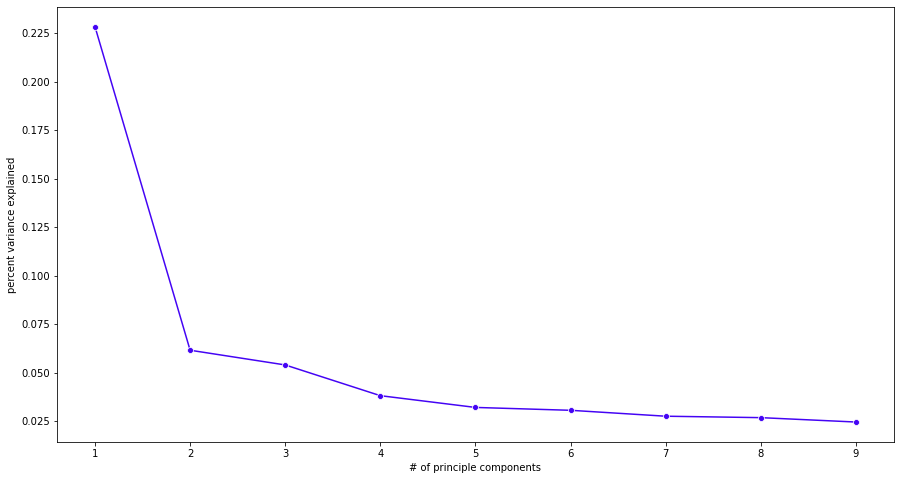

In [23]:
## Build df with number of components and explained variance
pc_df = pd.DataFrame(mod.explained_variance_ratio_,
                             index=np.arange(pca.n_components_) + 1,
                             columns=["percent variance explained"]).reset_index().rename(columns={"index":"# of principle components"})

plt.figure(figsize=(15,8))
sns.lineplot(x = "# of principle components",
            y = "percent variance explained",
            data=pc_df, 
            color = "#4404f4ff",
            marker="o")

Text(0.5, 0, 'PC3')

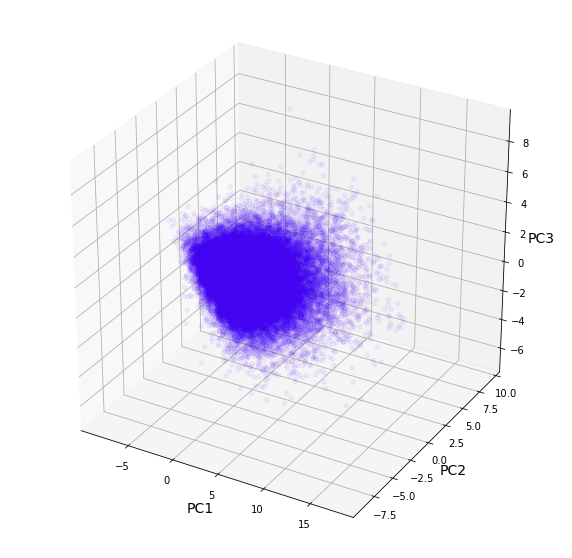

In [24]:
## look at shape of first three components
import matplotlib.pyplot as plt
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_std)
PCA_components = pd.DataFrame(principalComponents)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2], color = "#4404f4ff", alpha = 0.05)
ax.set_xlabel('PC1', size = 14)
ax.set_ylabel('PC2', size = 14)
ax.set_zlabel('PC3', size = 14)

### clustering

In [25]:
from sklearn.cluster import KMeans

principalComponents = pca.fit_transform(df_std)
PCA_components = pd.DataFrame(principalComponents)

ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:5])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    


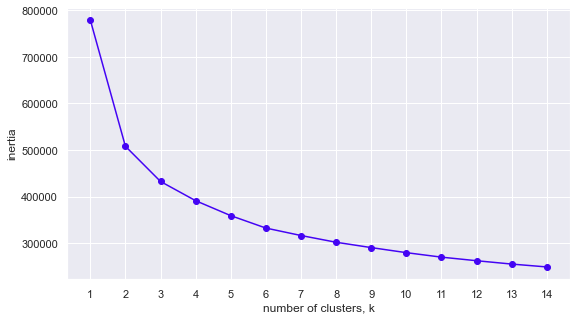

In [107]:
## plot inertia vs clusters
plt.figure(figsize=(9,5))

plt.plot(ks, inertias, '-o', color='#4404f4ff')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [27]:
## use kmeans into 3 clusters
from sklearn.cluster import KMeans

principalComponents = pca.fit_transform(df_std)
PCA_components = pd.DataFrame(principalComponents)

kmeans = KMeans(n_clusters=3, random_state=0).fit(PCA_components.iloc[:,:5])

## add do pca dataframe
PCA_components['k_labels'] = kmeans.labels_

Text(0.5, 0, 'PC3')

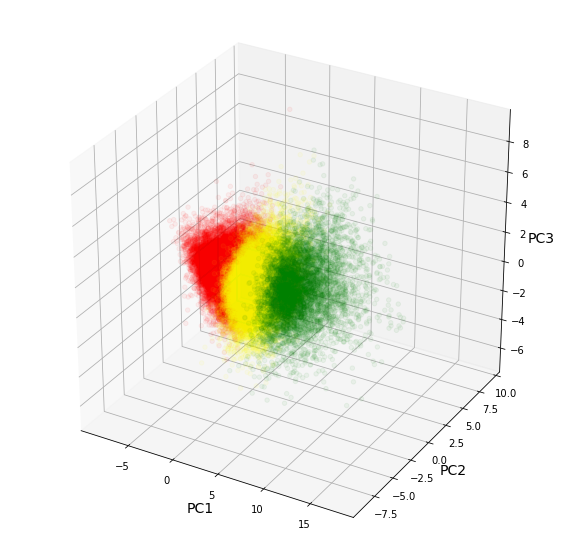

In [51]:
## divide into labels and replot 3d

lab1 = PCA_components[PCA_components['k_labels'] == 0] #yellow
lab2 = PCA_components[PCA_components['k_labels'] == 1] #red
lab3 = PCA_components[PCA_components['k_labels'] == 2] #green

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')


ax.scatter(lab1[0], lab1[1], lab1[2], color = "green", alpha = 0.05)
ax.scatter(lab2[0], lab2[1], lab2[2], color = "yellow", alpha = 0.05)
ax.scatter(lab3[0], lab3[1], lab3[2], color = "red", alpha = 0.05)
ax.set_xlabel('PC1', size = 14)
ax.set_ylabel('PC2', size = 14)
ax.set_zlabel('PC3', size = 14)

### look at countries within each cluster

In [29]:
## add country back in
PCA_components['cntry'] = df_noblanks['cntry']
PCA_components.sample(5)

,0,1,2,3,4,k_labels,cntry
30,1.380704,-0.133976,0.137660,0.560190,-0.560404,1,NaN
38709,0.470299,-0.356934,1.313596,-1.554327,-0.933038,1,NO
4128,-0.700104,-1.895895,0.851053,-1.932293,0.765996,1,BG
37103,-0.027231,-3.623698,0.208088,-0.091928,0.265608,1,NL
28134,-1.599438,0.166331,-1.281595,-0.711836,-0.909869,2,IE


In [102]:
## normalized percent of each country

graph = PCA_components.groupby(['cntry','k_labels']).count().reset_index()
totals = graph.groupby('cntry').sum(0).reset_index()
totals = totals.rename({0: 'totals'}, axis='columns')
percent = pd.merge(graph, totals[['cntry', 'totals']], on='cntry', how='left')
percent['%'] = (percent[0]/percent['totals'])*100
percent['k_labels'] = percent['k_labels'].astype('str')
percent = percent.pivot(index='cntry', columns='k_labels', values='%').reset_index()
percent['total'] = 100
percent[12] = percent['1'] + percent['2']

In [100]:
cntry_order = percent.groupby("cntry")['0'].median().sort_values()[::-1].index
cntry_order

Index(['LT', 'PL', 'CH', 'BE', 'PT', 'FR', 'IT', 'FI', 'IE', 'DK', 'NO', 'IS',
       'ES', 'GB', 'DE', 'BG', 'HU', 'NL', 'EE', 'IL', 'CZ', 'CY'],
      dtype='object', name='cntry')

Text(0.5, 1.0, 'Percentage of Survey Respondents in each Cluster by Country')

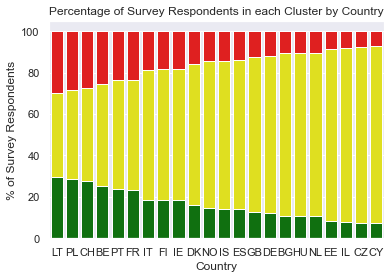

In [109]:
## plot percentages in each cluster by country
sns.barplot(y='total', x='cntry', data = percent, color='red', order = cntry_order)
sns.barplot(y=12, x='cntry', data = percent, color='yellow', order = cntry_order)
sns.barplot(y='0', x='cntry', data = percent, color='green', order = cntry_order)

plt.xlabel("Country")
plt.ylabel("% of Survey Respondents")
plt.title("Percentage of Survey Respondents in each Cluster by Country")